In [108]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import random
import matplotlib.colors as mcolors

#### Reading in Data

In [2]:
data=pd.read_csv('C:/Users/jovan/Downloads/archive (1)/sales data-set.csv')

In [5]:
data.tail(25)

,Store,Dept,Date,Weekly_Sales,IsHoliday
421545,45,98,11/05/2012,893.60,False
421546,45,98,18/05/2012,745.44,False
421547,45,98,25/05/2012,795.94,False
421548,45,98,01/06/2012,874.64,False
421549,45,98,08/06/2012,713.50,False
421550,45,98,15/06/2012,856.35,False
421551,45,98,22/06/2012,622.62,False
421552,45,98,29/06/2012,690.52,False
421553,45,98,06/07/2012,659.65,False
421554,45,98,13/07/2012,695.21,False


In [25]:
data1=data.groupby(['Store'])['Weekly_Sales'].sum().sort_values(ascending=False)

In [27]:
data1.head(10)

Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
10    2.716177e+08
27    2.538559e+08
6     2.237561e+08
1     2.224028e+08
39    2.074455e+08
Name: Weekly_Sales, dtype: float64

#### Plotting Total sales by Store

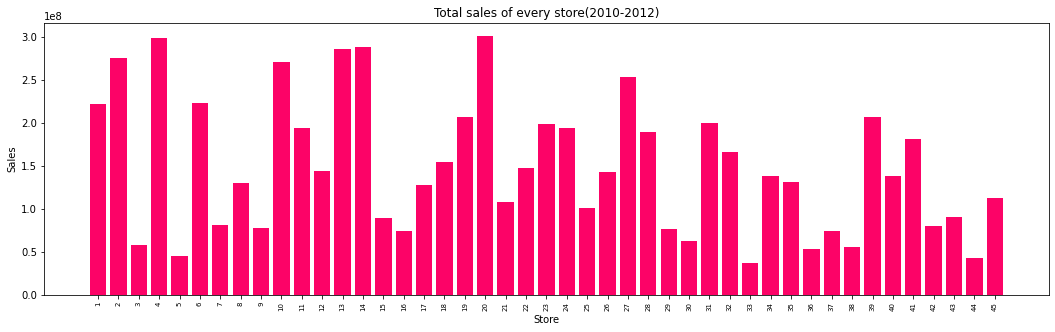

In [48]:
f, ax = plt.subplots(figsize=(18,5))
stores=[store for store, df in data.groupby(['Store'])]
y=data.groupby(['Store']).sum()
plt.bar(stores,y['Weekly_Sales'],color='#fc0367')
plt.xticks(stores,rotation='vertical',fontsize=7)
plt.xlabel('Store')
plt.ylabel('Sales')
plt.title('Total sales of every store(2010-2012)')
plt.show()

#### Filtering to show top 10 selling stores and visualizing

In [34]:
data2=data.groupby(['Store']).sum()

In [35]:
data2.head()

,Dept,Weekly_Sales,IsHoliday
Store,,,
1,454749,2.224028e+08,723.0
2,455425,2.753824e+08,722.0
3,370825,5.758674e+07,633.0
4,457340,2.995440e+08,727.0
5,371526,4.547569e+07,640.0


In [36]:
data2=data2.loc[data2['Weekly_Sales']>=2.074455e+08]

In [38]:
data2

,Dept,Weekly_Sales,IsHoliday
Store,,,
1,454749,2.224028e+08,723.0
2,455425,2.753824e+08,722.0
4,457340,2.995440e+08,727.0
6,453812,2.237561e+08,721.0
10,454210,2.716177e+08,724.0
13,467392,2.865177e+08,739.0
14,442053,2.889999e+08,703.0
20,450413,3.013978e+08,723.0
27,454685,2.538559e+08,719.0


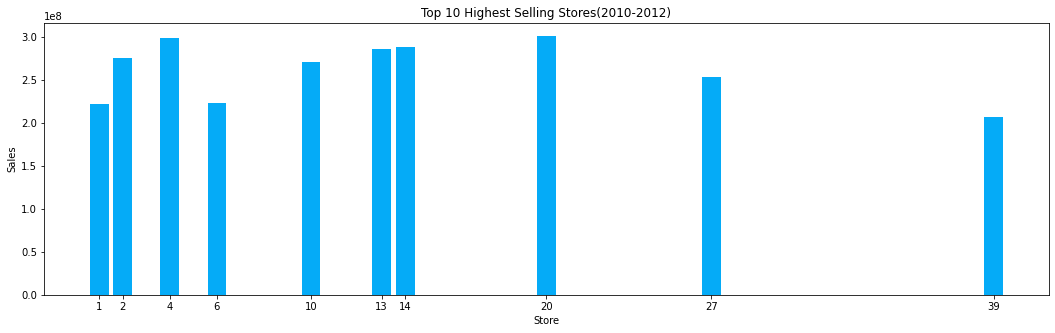

In [77]:
f, ax = plt.subplots(figsize=(18,5))
stores2=[store for store,df in data2.groupby(['Store'])]
y=data2.groupby(['Store']).sum()
plt.bar(stores2,y['Weekly_Sales'], width=0.8,color='#05abf7')
plt.xticks(stores2)
plt.xlabel('Store')
plt.ylabel('Sales')
plt.title('Top 10 Highest Selling Stores(2010-2012)')
plt.show()

                                Store 20 edges out store 4 for the highest selling Store

#### Filtering to show top 10 selling weeks for Store 20 and visualizing

In [63]:
data3=data.loc[data['Store']==20]

In [66]:
data3=data3.groupby(['Date']).sum()

In [61]:
data3=data3.groupby(['Date'])['Weekly_Sales'].sum().sort_values(ascending=False)

In [62]:
data3.head(10)

Date
24/12/2010    3766687.43
23/12/2011    3555371.03
25/11/2011    2906233.25
17/12/2010    2819193.17
26/11/2010    2811634.04
16/12/2011    2762816.65
10/12/2010    2752122.08
06/04/2012    2565259.92
09/12/2011    2546123.78
10/02/2012    2462978.28
Name: Weekly_Sales, dtype: float64

In [67]:
data4=data3.loc[data3['Weekly_Sales']>=2462978.28]

In [68]:
data4

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
06/04/2012,1420,3171,2565259.92,0.0
09/12/2011,1460,3267,2546123.78,0.0
10/02/2012,1460,3235,2462978.28,73.0
10/12/2010,1440,3138,2752122.08,0.0
16/12/2011,1480,3314,2762816.65,0.0
17/12/2010,1440,3138,2819193.17,0.0
23/12/2011,1500,3410,3555371.03,0.0
24/12/2010,1460,3183,3766687.43,0.0
25/11/2011,1460,3267,2906233.25,73.0


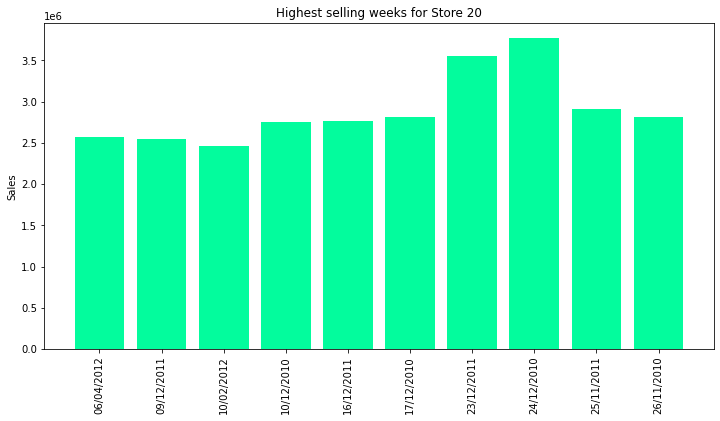

In [75]:
f, ax = plt.subplots(figsize=(12,6))
dates=[date for date,df in data4.groupby(['Date'])]
y=data4.groupby(['Date']).sum()
plt.bar(dates,y['Weekly_Sales'],color='#03fc9d')
plt.xticks(rotation='vertical')
plt.ylabel('Sales')
plt.title('Highest selling weeks for Store 20')
plt.show()

#### As the graph shows, The holiday season and in paticular the week of Christmas generates the most sales for Store 20. The top 2 selling weeks are both during Christmas and 8 out of the top 10 selling weeks are in November and December. 

#### Filtering to show top 10 selling depts for store 20 and visualizing

In [79]:
data5=data3=data.loc[data['Store']==20]

In [80]:
data5

,Store,Dept,Date,Weekly_Sales,IsHoliday
187335,20,1,05/02/2010,46021.21,False
187336,20,1,12/02/2010,52734.17,True
187337,20,1,19/02/2010,55649.79,False
187338,20,1,26/02/2010,36805.42,False
187339,20,1,05/03/2010,41206.78,False
...,...,...,...,...,...
197544,20,99,07/09/2012,0.67,True
197545,20,99,14/09/2012,0.05,False
197546,20,99,21/09/2012,29.91,False
197547,20,99,05/10/2012,660.00,False


In [83]:
data5.groupby(['Dept'])['Weekly_Sales'].sum().sort_values(ascending=False).head(10)

Dept
92    23542625.04
95    21537795.62
38    15759345.93
90    13707777.99
72    13154550.44
40    12372193.76
91    11224526.19
2     11189928.74
8     10931643.76
94     9030211.90
Name: Weekly_Sales, dtype: float64

In [84]:
data5=data3.groupby(['Dept']).sum()

In [86]:
data5=data5.loc[data5['Weekly_Sales']>=9030211.90]

In [87]:
data5

,Store,Weekly_Sales,IsHoliday
Dept,,,
2,2860,11189928.74,10.0
8,2860,10931643.76,10.0
38,2860,15759345.93,10.0
40,2860,12372193.76,10.0
72,2860,13154550.44,10.0
90,2860,13707777.99,10.0
91,2860,11224526.19,10.0
92,2860,23542625.04,10.0
94,2860,9030211.90,10.0


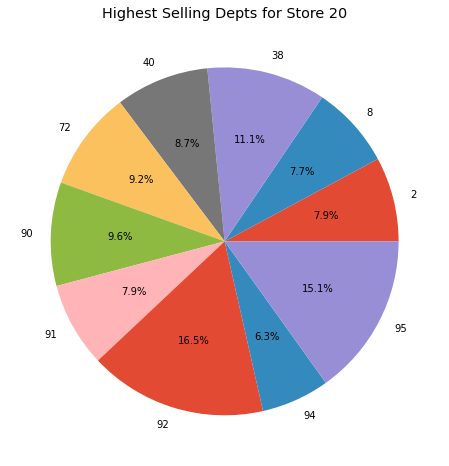

In [115]:
f, ax = plt.subplots(figsize=(15,8))
depts=[dept for dept, df in data5.groupby(['Dept'])]
y=data5.groupby(['Dept']).sum()
plt.pie(y['Weekly_Sales'],labels=depts,autopct='%1.1f%%')
plt.title('Highest Selling Depts for Store 20')
plt.show()

            From the Departments in Store 20, Department number 92 and Department number 95 sell the most

#### Filtering to show lowest selling weeks for Store 5 and Visualizing

In [119]:
data6=data.loc[data['Store']==5]

In [120]:
data6

,Store,Dept,Date,Weekly_Sales,IsHoliday
39790,5,1,05/02/2010,9323.89,False
39791,5,1,12/02/2010,16861.10,True
39792,5,1,19/02/2010,11417.67,False
39793,5,1,26/02/2010,7168.41,False
39794,5,1,05/03/2010,8344.13,False
...,...,...,...,...,...
48784,5,98,06/07/2012,94.50,False
48785,5,98,13/07/2012,27.00,False
48786,5,98,20/07/2012,8.00,False
48787,5,98,03/08/2012,10.00,False


In [125]:
data6.groupby(['Date'])['Weekly_Sales'].sum().sort_values(ascending=False).tail(10)

Date
28/01/2011    279088.39
16/09/2011    278529.71
29/10/2010    278031.81
21/01/2011    275313.34
29/07/2011    275142.17
23/07/2010    274742.63
26/03/2010    273282.97
26/02/2010    270281.63
30/07/2010    268929.03
14/01/2011    260636.71
Name: Weekly_Sales, dtype: float64

In [132]:
data6=data6.loc[data6['Weekly_Sales']<=279088.39]
data6

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
14/01/2011,320,2675,260636.71,0.0
16/09/2011,305,2477,278529.71,0.0
21/01/2011,320,2640,275313.34,0.0
23/07/2010,300,2460,274742.63,0.0
26/02/2010,325,2632,270281.63,0.0
26/03/2010,310,2458,273282.97,0.0
29/07/2011,310,2565,275142.17,0.0
29/10/2010,315,2548,278031.81,0.0
30/07/2010,305,2518,268929.03,0.0


In [133]:
data6=data6.groupby(['Date']).sum()

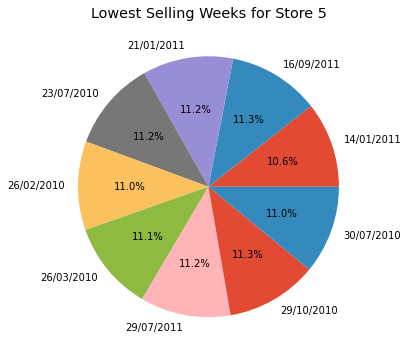

In [139]:
f, ax = plt.subplots(figsize=(12,6))
dates=[date for date,df in data6.groupby(['Date'])]
y=data6.groupby(['Date']).sum()
plt.pie(y['Weekly_Sales'],labels=dates,autopct='%1.1f%%')
plt.title('Lowest Selling Weeks for Store 5')
plt.xticks(rotation='vertical')
plt.show()

#### As the pie chart shows, None of the top 10 lowest selling weeks were in Nov or Dec as those months usually sell the most overall. Jan and July seem to have most of the lowest selling weeks. In order to maximize profits advertising and spending should be focused on Nov and Dec, while Jan and July do not as high potential return

#### Converting to Monthly Data and Visualizing

In [163]:
data['Date'] = pd.to_datetime(data['Date'])

In [167]:
data.set_index('Date', inplace=True)

In [170]:
data=data.resample('M').mean()

In [171]:
data

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-01-31,22.193526,43.940716,14391.780535,0.000000
2010-02-28,22.083347,44.204596,16244.436211,0.000000
2010-03-31,22.128687,44.120442,15828.833079,0.000000
2010-04-30,22.117793,44.196122,15701.015586,0.000000
2010-05-31,22.121009,44.173886,15971.989499,0.000000
2010-06-30,22.217371,44.288914,16278.409330,0.000000
2010-07-31,22.183500,44.310289,15785.689680,0.000000
2010-08-31,22.204540,44.128880,15866.055025,0.000000
2010-09-30,22.166368,44.078959,15339.655205,0.000000


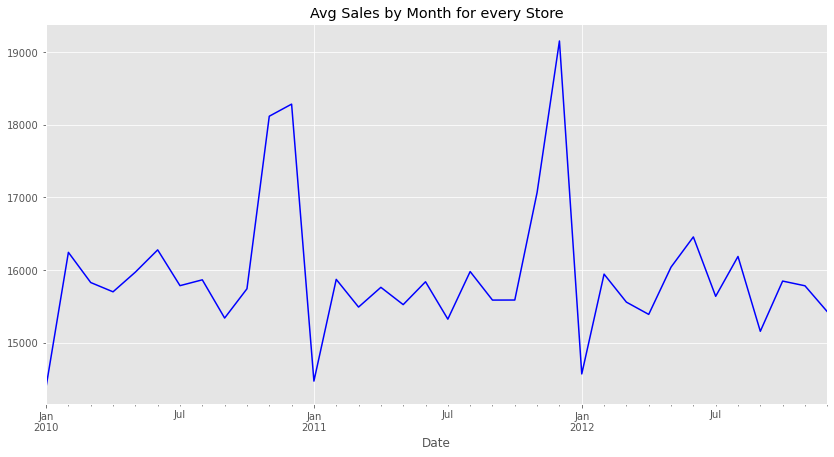

In [177]:
data.plot(y='Weekly_Sales',legend=False,figsize=(14,7),title='Avg Sales by Month for every Store',color='b')

#### As this graph shows there is a spike in sales around the end of the year. Sales are mostly constant until the holiday season